In [1]:
# Loop through all matches in the season to get pass events
from statsbombpy import sb

# Get all matches in the season
competitions = sb.competitions()
season_matches = sb.matches(competition_id=9, season_id=281)  # Example for Bundesliga 2023-24

# Fetch all pass events for the season
all_pass_events = []
for match_id in season_matches['match_id']:
    events = sb.events(match_id=match_id)
    pass_events = events[events['type'] == 'Pass']
    all_pass_events.append(pass_events)

# Concatenate all pass events into one dataframe
import pandas as pd
season_pass_events = pd.concat(all_pass_events, ignore_index=True)

C:\ProgramData\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [189]:
season_pass_events.to_csv('E:/The atheltics interview/season_pass_events.csv', index=False)

In [2]:
# Generate weights by counting the frequency of passer-recipient pairs
pass_counts = season_pass_events.groupby(['player', 'pass_recipient']).size().reset_index(name='weight')

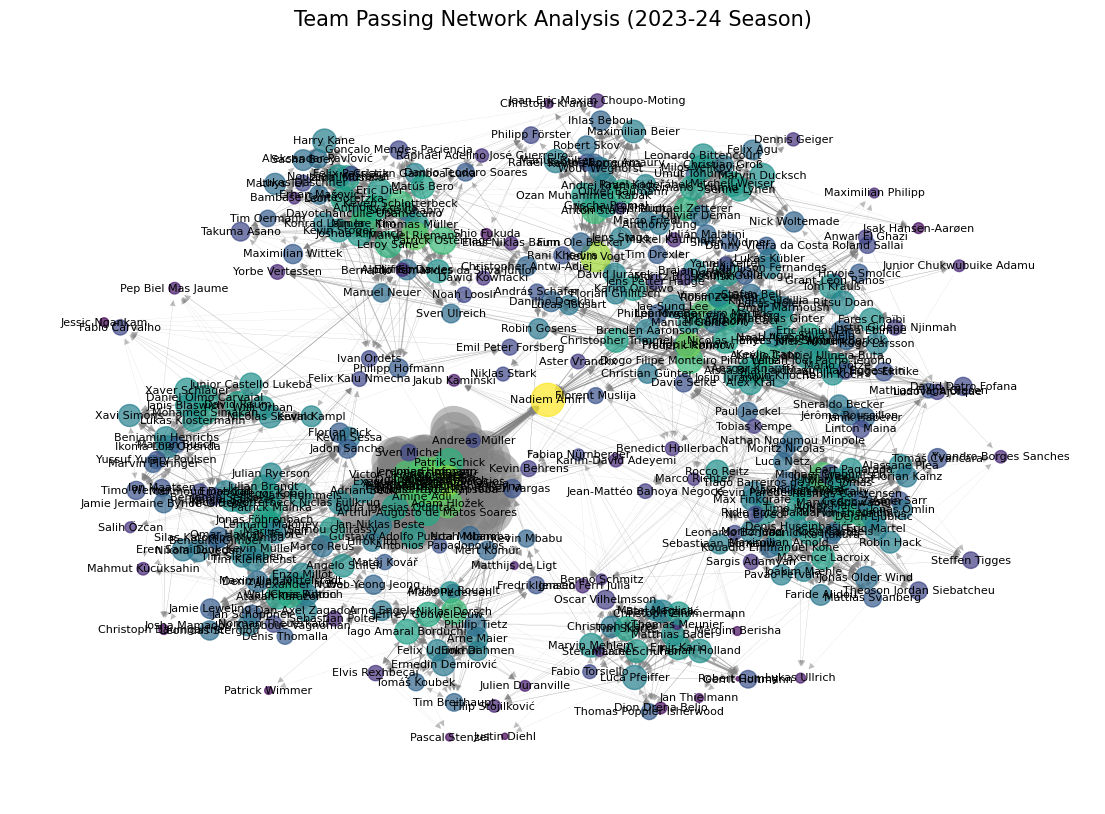

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a graph
team_graph = nx.DiGraph()

# Add nodes and edges with weights
for _, row in pass_counts.iterrows():
    passer = row['player']
    recipient = row['pass_recipient']
    weight = row['weight']
    if pd.notna(recipient):
        team_graph.add_edge(passer, recipient, weight=weight)

# Node sizes based on degree, scaled for better visibility
node_sizes = [team_graph.degree(node) * 10 for node in team_graph.nodes()]

# Edge widths based on the 'weight' attribute of the edges
edge_widths = [team_graph[u][v]['weight'] * 0.1 for u, v in team_graph.edges()]  # Adjust multiplier for better visibility

# Node colors based on out-degree
node_colors = [team_graph.out_degree(node) for node in team_graph]

# Use a spring layout for better node positioning
pos = nx.spring_layout(team_graph, k=0.5)  # Adjust 'k' as needed to spread nodes

# Drawing the graph
plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(team_graph, pos, node_size=node_sizes, node_color=node_colors, cmap='viridis', alpha=0.7)
nx.draw_networkx_edges(team_graph, pos, edge_color='gray', width=edge_widths, alpha=0.5)
nx.draw_networkx_labels(team_graph, pos, font_size=8, font_family='sans-serif')
plt.title("Team Passing Network Analysis (2023-24 Season)", size=15)
plt.axis('off')  # Hide the axes
plt.show()

In [51]:
#filtering the data for Bayer Leverkusen
from statsbombpy import sb

# Define the team ID for the team you're interested in
team_id = 904  # team ID for Bayer Leverkusen

# Get all matches in the season for a specific competition and season
season_matches = sb.matches(competition_id=9, season_id=281)  # Bundesliga 2023-24

# Fetch all pass events for the season for the specific team
all_pass_events = []
for match_id in season_matches['match_id']:
    events = sb.events(match_id=match_id)
    # Filter events for the specific team
    team_pass_events = events[(events['type'] == 'Pass') & (events['team_id'] == team_id)]
    all_pass_events.append(team_pass_events)

# Concatenate all pass events into one dataframe
import pandas as pd
team_season_pass_events = pd.concat(all_pass_events, ignore_index=True)

In [53]:
# Assuming 'season_pass_events' has columns 'player' for the passer and 'pass_recipient' for the receiver
# Generate weights by counting the frequency of passer-recipient pairs
pass_counts = team_season_pass_events.groupby(['player', 'pass_recipient']).size().reset_index(name='weight')

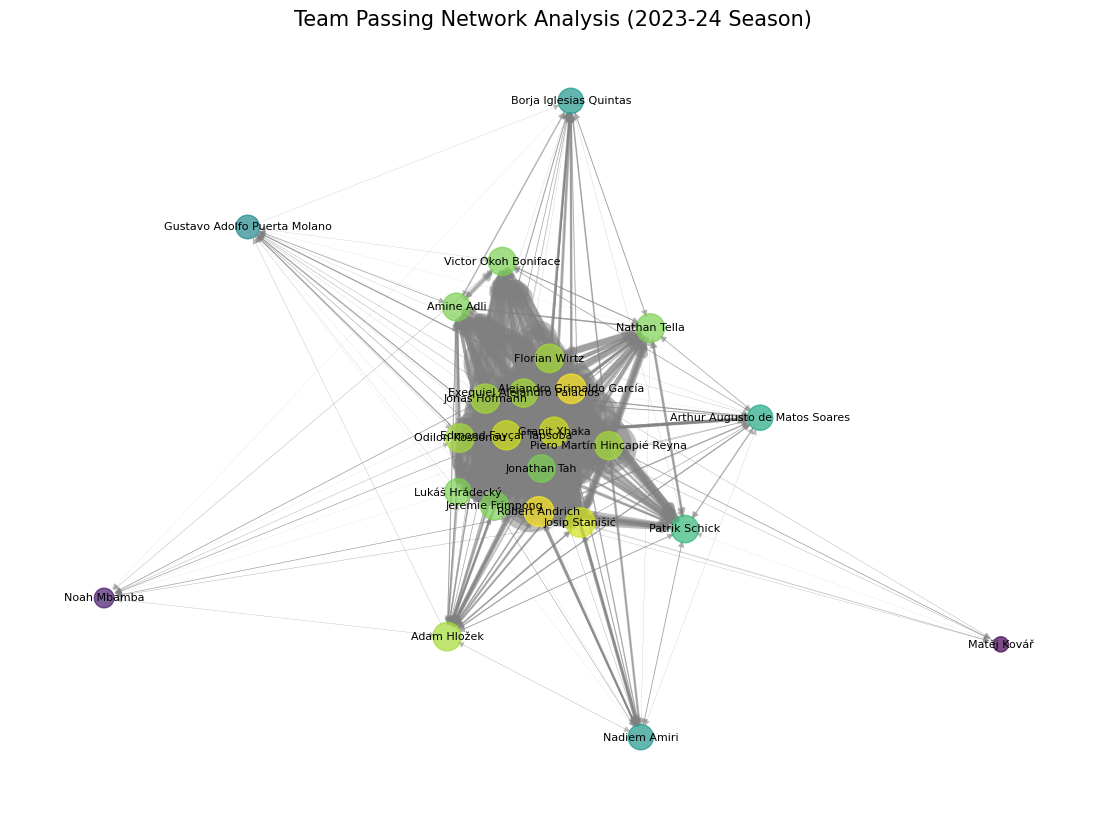

In [55]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a graph for the whole team
team_graph = nx.DiGraph()

# Add nodes and edges with weights
for _, row in pass_counts.iterrows():
    passer = row['player']
    recipient = row['pass_recipient']
    weight = row['weight']
    if pd.notna(recipient):
        team_graph.add_edge(passer, recipient, weight=weight)

# Node sizes based on degree, scaled for better visibility
node_sizes = [team_graph.degree(node) * 10 for node in team_graph.nodes()]

# Edge widths based on the 'weight' attribute of the edges
edge_widths = [team_graph[u][v]['weight'] * 0.1 for u, v in team_graph.edges()]  # Adjust multiplier for better visibility

# Node colors based on out-degree
node_colors = [team_graph.out_degree(node) for node in team_graph]

# Use a spring layout for better node positioning
pos = nx.spring_layout(team_graph, k=0.5)  # Adjust 'k' as needed to spread nodes

# Drawing the graph
plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(team_graph, pos, node_size=node_sizes, node_color=node_colors, cmap='viridis', alpha=0.7)
nx.draw_networkx_edges(team_graph, pos, edge_color='gray', width=edge_widths, alpha=0.5)
nx.draw_networkx_labels(team_graph, pos, font_size=8, font_family='sans-serif')
plt.title("Team Passing Network Analysis (2023-24 Season)", size=15)
plt.axis('off')  # Hide the axes
plt.show()

In [57]:
# Filter passes made by Granit Xhaka
xhaka_pass_events = season_pass_events[season_pass_events['player'] == 'Granit Xhaka']
xhaka_pass_events

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,pass_straight,shot_open_goal,dribble_no_touch,goalkeeper_shot_saved_off_target,shot_saved_off_target,goalkeeper_shot_saved_to_post,shot_saved_to_post,clearance_other,goalkeeper_success_out,goalkeeper_success_in_play
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
xhaka_pass_events.to_csv('E:/The atheltics interview/xhaka_pass_events.csv', index=False)

In [61]:
# Extract relevant columns for network analysis
xhaka_network_data = xhaka_pass_events[['player', 'pass_recipient', 'location', 'pass_end_location', 'match_id', 'period']]

# Rename columns for easier handling
xhaka_network_data.rename(columns={
    'player': 'passer',
    'pass_recipient': 'recipient',
    'location': 'start_location',
    'pass_end_location': 'end_location'
}, inplace=True)

C:\Users\amin8\AppData\Local\Temp\ipykernel_53280\2959976628.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xhaka_network_data.rename(columns={


In [63]:
xhaka_network_data

,passer,recipient,start_location,end_location,match_id,period
17,Granit Xhaka,Jonathan Tah,"[57.1, 20.8]","[56.4, 44.2]",3895302,1
26,Granit Xhaka,Jonathan Tah,"[66.3, 62.2]","[53.0, 62.2]",3895302,1
28,Granit Xhaka,Odilon Kossonou,"[63.9, 56.1]","[73.3, 72.8]",3895302,1
39,Granit Xhaka,Jonas Hofmann,"[61.6, 66.1]","[68.9, 64.8]",3895302,1
44,Granit Xhaka,Robert Andrich,"[76.1, 19.2]","[83.2, 16.1]",3895302,1
...,...,...,...,...,...,...
38875,Granit Xhaka,Victor Okoh Boniface,"[72.3, 41.6]","[89.0, 40.8]",3895052,2
38908,Granit Xhaka,Jonas Hofmann,"[55.6, 42.6]","[70.5, 62.3]",3895052,2
39027,Granit Xhaka,Jonas Hofmann,"[41.8, 36.1]","[50.7, 45.5]",3895052,2
39100,Granit Xhaka,Odilon Kossonou,"[84.5, 22.8]","[68.7, 48.3]",3895052,2


In [65]:
# Extract start locations for spatial heatmap
xhaka_heatmap_data = xhaka_pass_events[['location', 'match_id', 'period']]
xhaka_heatmap_data.rename(columns={'location': 'start_location'}, inplace=True)

C:\Users\amin8\AppData\Local\Temp\ipykernel_53280\4107270318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xhaka_heatmap_data.rename(columns={'location': 'start_location'}, inplace=True)


In [15]:
# Save network data
xhaka_network_data.to_csv('E:/The atheltics interview/xhaka_passing_network.csv', index=False)

# Save heatmap data
xhaka_heatmap_data.to_csv('E:/The atheltics interview/xhaka_heatmap_data.csv', index=False)


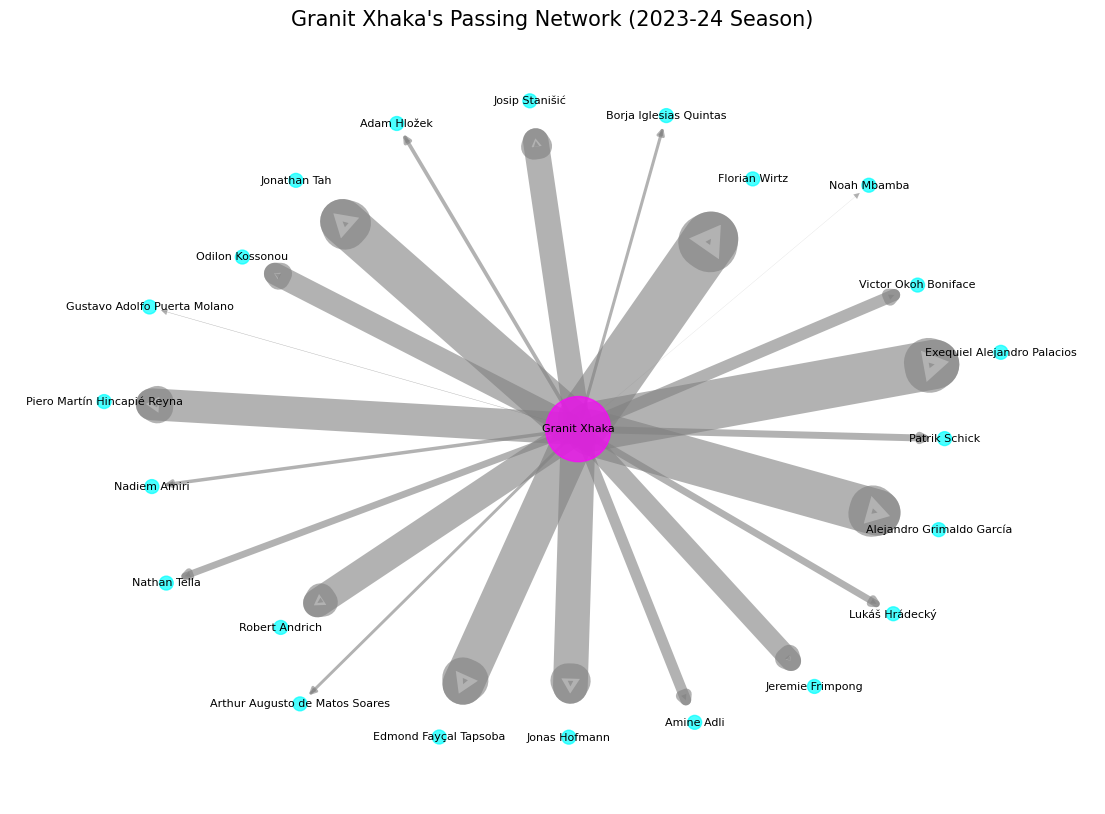

In [67]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Generate weights by counting the frequency of passer-recipient pairs
# Assuming that each row represents a single pass event
pass_counts = xhaka_network_data.groupby(['passer', 'recipient']).size().reset_index(name='weight')

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges with weights
for _, row in pass_counts.iterrows():
    if pd.notna(row['recipient']):
        G.add_edge(row['passer'], row['recipient'], weight=row['weight'])

# Node sizes based on total degree (scaled for visibility)
node_sizes = [G.degree(node) * 100 for node in G]  # Adjust size multiplier as needed

# Edge widths based on the 'weight' attribute of the edges
edge_widths = [G[u][v]['weight'] * 0.1 for u, v in G.edges()]  # Scale for better visibility

# Node colors based on out-degree (more outgoing passes, different color)
node_colors = [G.out_degree(node) for node in G]

# Use a spring layout with adjusted distance for clarity
pos = nx.spring_layout(G, k=0.3)  # Adjust 'k' to spread nodes to a suitable distance

# Drawing the graph
plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap='cool', alpha=0.7)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=edge_widths, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
plt.title("Granit Xhaka's Passing Network (2023-24 Season)", size=15)
plt.axis('off')
plt.show()

In [192]:
team_season_pass_events.to_csv('E:/The atheltics interview/team_season_pass_events.csv', index=False)

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
xhaka_passes = xhaka_pass_events.copy()
# Assuming 'xhaka_passes' is your filtered DataFrame
# Extract starting and ending coordinates for each pass
xhaka_passes[['start_x', 'start_y']] = pd.DataFrame(xhaka_passes['location'].tolist(), index=xhaka_passes.index)
xhaka_passes[['end_x', 'end_y']] = pd.DataFrame(xhaka_passes['pass_end_location'].tolist(), index=xhaka_passes.index)

def categorize_pass_length(row):
    length = row['pass_length']
    if length <= 15:
        return 'Short'
    elif length <= 30:
        return 'Medium'
    else:
        return 'Long'

xhaka_passes['pass_range'] = xhaka_passes.apply(categorize_pass_length, axis=1)

# Calculate pass success rates by range
pass_success_rate = xhaka_passes.groupby('pass_range')['pass_outcome'].apply(lambda x: (x == 'Complete').sum() / len(x))

In [71]:
#identify key passes and calculate expected assists using pass_shot_assist
xhaka_passes['key_pass'] = xhaka_passes['pass_shot_assist'].notna()
key_passes = xhaka_passes[xhaka_passes['key_pass'] == True]
xa = key_passes['shot_statsbomb_xg'].sum()

print(f"Total Expected Assists (xA) from Xhaka's key passes: {xa:.2f}")

Total Expected Assists (xA) from Xhaka's key passes: 0.00


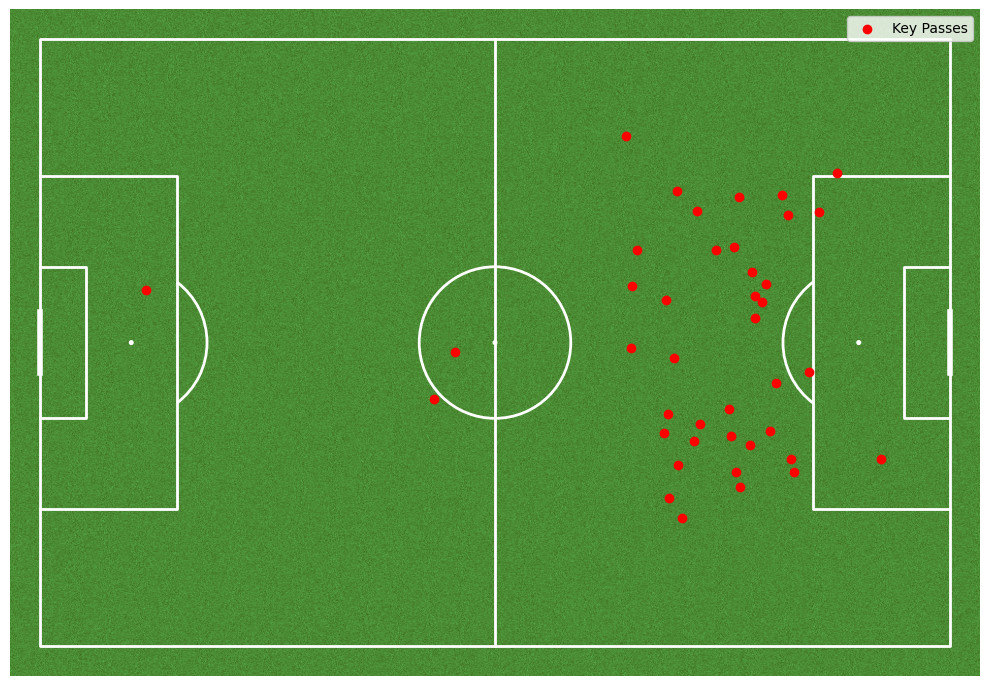

In [73]:
# Visualize key pass locations on the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 7))
pitch.scatter(key_passes['start_x'], key_passes['start_y'], ax=ax, marker='o', color='red', label='Key Passes')
ax.legend()
plt.show()

In [75]:
# Define pass outcome
xhaka_passes['is_successful'] = (xhaka_passes['possession_team'] == 'Bayer Leverkusen') & (xhaka_passes['pass_recipient'].notna())

In [47]:

print(xhaka_passes['pass_recipient'].isna().sum())

15


C:\Users\amin8\AppData\Local\Temp\ipykernel_53280\3064363849.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=xhaka_passes['start_x'], y=xhaka_passes['start_y'], ax=ax,


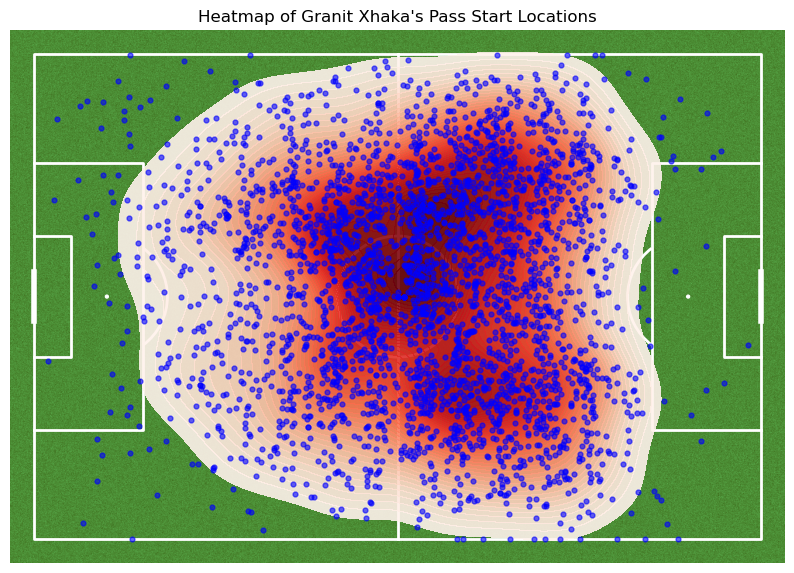

In [49]:
#Pass Start Locations
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and then create a pitch on this figure
fig, ax = plt.subplots(figsize=(10, 7))
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
pitch.draw(ax=ax)

# Create the heatmap using seaborn's kdeplot for density
sns.kdeplot(x=xhaka_passes['start_x'], y=xhaka_passes['start_y'], ax=ax,
            levels=50, shade=True, shade_lowest=False, alpha=0.9, cmap='Reds')

# Optionally, add scatter plot to show exact pass locations
pitch.scatter(x=xhaka_passes['start_x'], y=xhaka_passes['start_y'], ax=ax, color='blue', s=12, alpha=0.6)

plt.title('Heatmap of Granit Xhaka\'s Pass Start Locations')
plt.show()